In [16]:
import re
import os
import sys
import nltk
import string
import itertools
import csv
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from sklearn import preprocessing, tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import LinearSVC
from features import *
from tokenizer import tokenize

In [17]:
def read_file(filename):
    with open(filename, 'r', encoding="utf-8") as f:
        reader = csv.reader(f)
        # read the header
        header_row = next(reader)
        data_set = []
        # store the data in a list
        for row in reader:
            data_set.append(row)
        # tokenize the text
        for data in data_set:
            data[0] = tokenize(data[0])
        return data_set
    
def extract_words(data_set):
    '''construct a sorted list of all the words (no duplicates) in the data set'''
    words = []
    for data in data_set:
        words += data[0]
    return sorted(set(words))

In [18]:
""" Dataset: one-sentence"""
file_name = 'data/train.csv'

documents_words = extract_words(read_file(file_name))
documents = read_file(file_name)
y = [lst[1] for lst in documents]

In [19]:
documents

[[['says',
   'the',
   'annies',
   'list',
   'political',
   'group',
   'supports',
   'third',
   'trimester',
   'abortions',
   'on',
   'demand'],
  'FALSE'],
 [['when',
   'did',
   'the',
   'decline',
   'of',
   'coal',
   'start',
   'it',
   'started',
   'when',
   'natural',
   'gas',
   'took',
   'off',
   'that',
   'started',
   'to',
   'begin',
   'in',
   'president',
   'george',
   'w',
   'bushs',
   'administration'],
  'TRUE'],
 [['hillary',
   'clinton',
   'agrees',
   'with',
   'john',
   'mccain',
   'by',
   'voting',
   'to',
   'give',
   'george',
   'bush',
   'the',
   'benefit',
   'of',
   'the',
   'doubt',
   'on',
   'iran'],
  'TRUE'],
 [['health',
   'care',
   'reform',
   'legislation',
   'is',
   'likely',
   'to',
   'mandate',
   'free',
   'sex',
   'change',
   'surgeries'],
  'FALSE'],
 [['the',
   'economic',
   'turnaround',
   'started',
   'at',
   'the',
   'end',
   'of',
   'my',
   'term'],
  'TRUE'],
 [['the',
   'chicago'

In [20]:
folder = os.getcwd() + '/classifiers'
try:
    os.mkdir(folder)
except FileExistsError:
    pass

In [21]:
""" One Hot Encoder """
def ohe_encoder(X):
    """ Use One Hot Encoder deals to turn all values in a list into binary values"""
    ohe_encoder = preprocessing.OneHotEncoder(categories='auto', handle_unknown='ignore')
    ohe_encoder.fit(X)
    X = ohe_encoder.transform(X).toarray()
    return X

In [22]:
def get_X(feature):
    try:
        X = [feature(d) for (d, label) in documents]
        X = ohe_encoder(X)
    except:
        X = [feature(d, documents_words) for (d, label) in documents]
        X = ohe_encoder(X)
    return X

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.02f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
def run_classifier(feature, classifier): 
    X = get_X(feature)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    clf = classifier
    #clf = MultinomialNB()
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    #f1 = f1_score(y_test, y_pred.tolist(), pos_label="pos")
    cnf_matrix = confusion_matrix(y_test, y_pred.tolist())
    np.set_printoptions(precision=2)
#     print(cnf_matrix)
    # Plot non-normalized confusion matrix
    class_names = ['real','fake']
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix using '+feature.__name__)

    plt.show()
    
    target_names = ['real','fake']
    clf_report = classification_report(y_test, y_pred.tolist(), target_names=target_names)
    print(clf_report)

In [25]:
features = [raw_count, pos_tagger, senti_features2, word_length_features]

============ MultinomialNB ============
raw_count
Confusion matrix, without normalization
[[455 450]
 [347 796]]
Normalized confusion matrix
[[0.5 0.5]
 [0.3 0.7]]


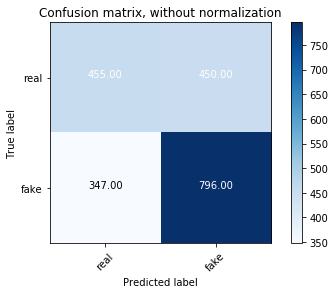

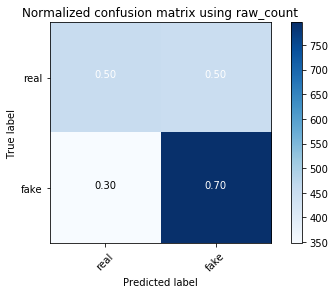

              precision    recall  f1-score   support

        real       0.57      0.50      0.53       905
        fake       0.64      0.70      0.67      1143

    accuracy                           0.61      2048
   macro avg       0.60      0.60      0.60      2048
weighted avg       0.61      0.61      0.61      2048

============ MultinomialNB ============
pos_tagger


TypeError: pos_tagger() takes 1 positional argument but 2 were given

In [26]:
for feature in features:
    print("============ MultinomialNB ============")
    print(feature.__name__)
    run_classifier(feature, MultinomialNB())

In [ ]:
for feature in features:
    print("=========== LogisticRegression =============")
    print(feature.__name__)
    run_classifier(feature, LogisticRegression())

In [ ]:
for feature in features:
    print("=========== RandomForestClassifier =============")
    print(feature.__name__)
    run_classifier(feature, RandomForestClassifier())

In [ ]:
for feature in features:
    print("============ DecisionTreeClassifier ============")
    print(feature.__name__)
    run_classifier(feature, tree.DecisionTreeClassifier())

In [ ]:
for feature in features:
    print("=========== LinearSVC =============")
    print(feature.__name__)
    run_classifier(feature, LinearSVC())